# Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn 
import pathlib
import os
import random

# Data Preprocessing

In [2]:
data_dir_train = pathlib.Path('./dataset/Train/')
data_dir_test = pathlib.Path('./dataset/Test/')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

6787
50


In [34]:
batch_size = 32
img_height = 28
img_width = 28
rnd_seed = 123
random.seed(rnd_seed)

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6787 files belonging to 10 classes.
Using 5430 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6787 files belonging to 10 classes.
Using 1357 files for validation.


In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 50 files belonging to 10 classes.
Using 45 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

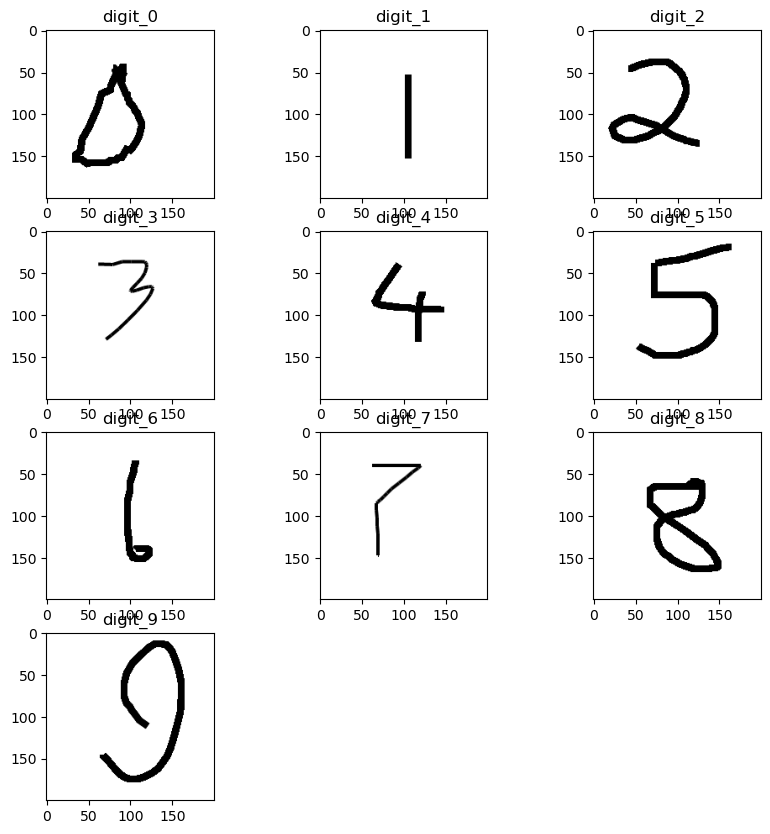

In [19]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(4,3,i+1)
  image = matplotlib.image.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[2]))
  plt.title(class_names[i])
  plt.imshow(image)

In [20]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 28, 28, 3)
(32,)


# Convolutional Neural Network (CNN)

In [26]:
num_classes = len(class_names)
model = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(tf.keras.layers.Conv2D(32, 3,padding="same",activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(64, 3,padding="same",activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128, 3,padding="same",activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(256, 3,padding="same",activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(tf.keras.layers.Dense(units=num_classes, activation= 'softmax'))

In [27]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


170/170 [==============================] - 2s 11ms/step - loss: 2.2695 - accuracy: 0.1416 - val_loss: 2.2179 - val_accuracy: 0.2351
Epoch 2/10
170/170 [==============================] - 2s 10ms/step - loss: 1.8248 - accuracy: 0.3672 - val_loss: 1.6135 - val_accuracy: 0.4569
Epoch 3/10
170/170 [==============================] - 2s 10ms/step - loss: 1.4047 - accuracy: 0.5249 - val_loss: 1.0429 - val_accuracy: 0.6632
Epoch 4/10
170/170 [==============================] - 2s 10ms/step - loss: 1.1561 - accuracy: 0.6273 - val_loss: 0.8815 - val_accuracy: 0.7377
Epoch 5/10
170/170 [==============================] - 2s 10ms/step - loss: 0.9988 - accuracy: 0.6724 - val_loss: 0.7538 - val_accuracy: 0.7775
Epoch 6/10
170/170 [==============================] - 2s 10ms/step - loss: 0.9429 - accuracy: 0.6963 - val_loss: 0.6791 - val_accuracy: 0.8077
Epoch 7/10
170/170 [==============================] - 2s 10ms/step - loss: 0.8415 - accuracy: 0.7315 - val_loss: 0.6791 - val_accuracy: 0.7841
Epoch 8/10

In [29]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.8444


[0.5871396660804749, 0.8444444537162781]

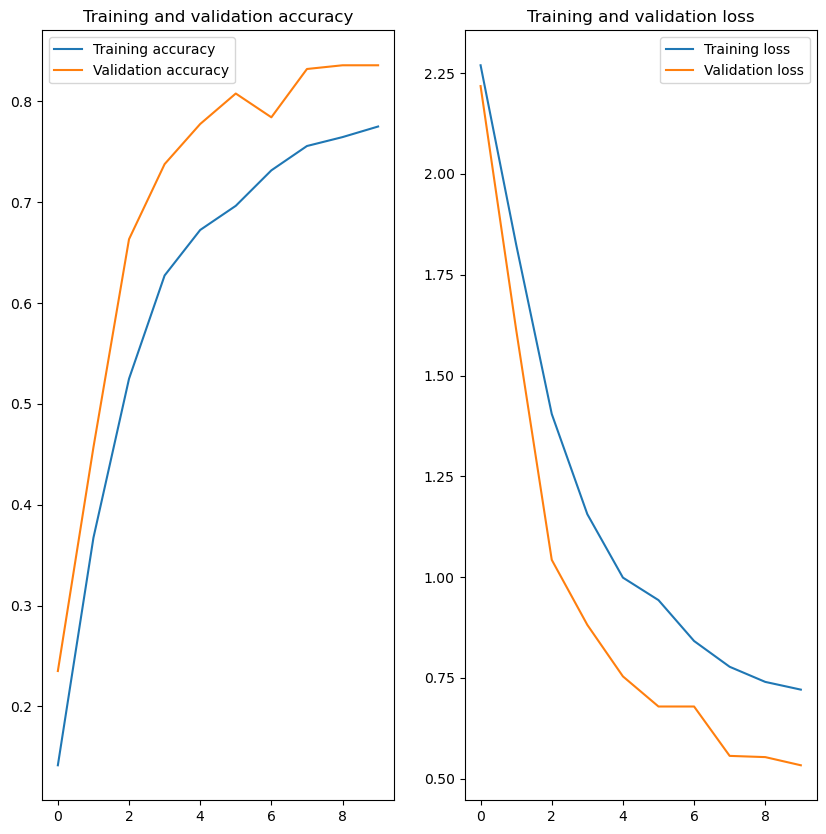

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training loss")
plt.plot(epochs_range, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()


In [36]:
model.save('./trained/hwd.h5')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              6423552   
                                                      

# TRANSFER LEARNING 💪

In [29]:
batch_size = 32
# Transfer Learning Models require the image height and width at least 32
img_height = 32 
img_width = 32

In [30]:
train_ds_tl = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds_tl = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds_tl = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6787 files belonging to 10 classes.
Using 5430 files for training.
Found 6787 files belonging to 10 classes.
Using 1357 files for validation.
Found 50 files belonging to 10 classes.
Using 45 files for validation.


In [31]:
base_model = tf.keras.applications.DenseNet201(include_top=False, weights="imagenet", input_shape=(img_height, img_width, 3), pooling='max')
tl_model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
])

# Use sparse_categorical_crossentropy for integer labels (one hot encoder)
tl_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
tl_model.fit(train_ds_tl, epochs=5, validation_data=val_ds_tl)

Epoch 1/5
170/170 [==============================] - 41s 158ms/step - loss: 1.1495 - accuracy: 0.6361 - val_loss: 0.9828 - val_accuracy: 0.7797
Epoch 2/5
170/170 [==============================] - 24s 144ms/step - loss: 0.4723 - accuracy: 0.8576 - val_loss: 0.4314 - val_accuracy: 0.8777
Epoch 3/5
170/170 [==============================] - 24s 139ms/step - loss: 0.2744 - accuracy: 0.9177 - val_loss: 0.4181 - val_accuracy: 0.8880
Epoch 4/5
170/170 [==============================] - 24s 139ms/step - loss: 0.1896 - accuracy: 0.9416 - val_loss: 0.3344 - val_accuracy: 0.9079
Epoch 5/5
170/170 [==============================] - 24s 143ms/step - loss: 0.1303 - accuracy: 0.9600 - val_loss: 0.3356 - val_accuracy: 0.9116


In [33]:
tl_model.evaluate(test_ds_tl)

2/2 [==============================] - 0s 31ms/step - loss: 0.2546 - accuracy: 0.9111


[0.25461846590042114, 0.9111111164093018]